CABBAGE DISEASE CLASSIFIER

Importing Libraries

In [2]:
from __future__ import absolute_import, print_function,division, unicode_literals

import os.path
import glob
import shutil

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation
from keras import regularizers
import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [4]:
print(tf.__version__)

2.3.1


In [5]:
BATCH_SIZE = 64
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [6]:
data_dir ="Downloads/Images"
data_dir = pathlib.Path(data_dir)

CLASS_NAMES = np.array(['Backmoth','Leafminer','Mildew'])

print('Class Names: ', CLASS_NAMES)

Class Names:  ['Backmoth' 'Leafminer' 'Mildew']


In [7]:
#Group into train, test and validation sets
for cl in CLASS_NAMES:
    data_path = os.path.join(data_dir, cl)
    images = glob.glob(data_path + "/*")
    print("{} :{} ".format(cl,len(images)))
    train, val = images[:round(len(images)*0.8)],images[round(len(images)*0.8):]
    
    for t in train:
        if not os.path.exists(os.path.join(data_dir, 'train', cl)):
            os.makedirs(os.path.join(data_dir, 'train', cl))
        shutil.move(t,os.path.join(data_dir, 'train', cl))
        
    for v in val:
        if not os.path.exists(os.path.join(data_dir, 'val', cl)):
            os.makedirs(os.path.join(data_dir, 'val', cl))
        shutil.move(v,os.path.join(data_dir, 'val', cl))
    
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')

Backmoth :0 
Leafminer :0 
Mildew :0 


Data Augementation

In [8]:
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)

train_data_gen = image_train_gen.flow_from_directory(train_dir,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     class_mode='sparse')

img_val_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = img_val_gen.flow_from_directory(val_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT,IMG_WIDTH),
                                               class_mode='sparse')

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [9]:
# Helper function
def plotImages(image_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

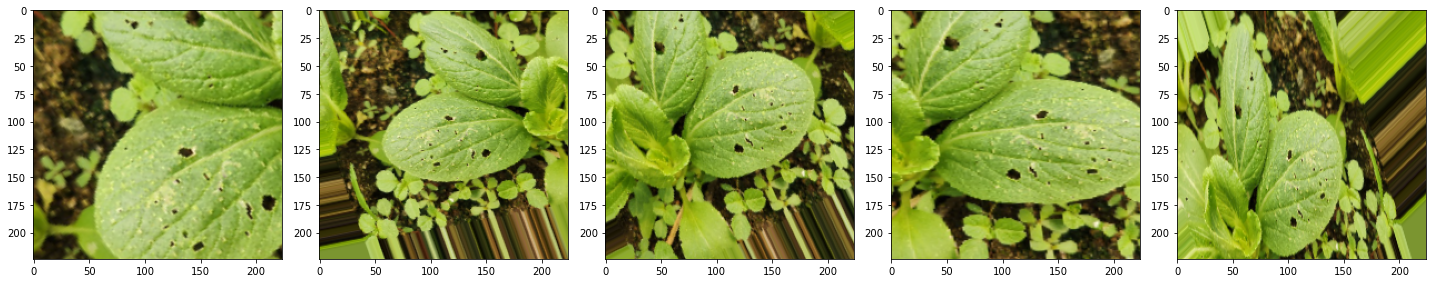

In [12]:
# Plot a few training images
img_array = [train_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

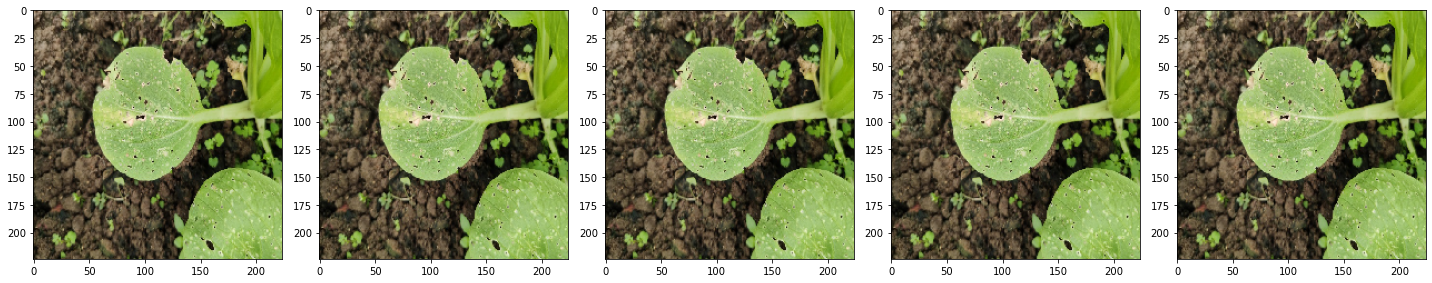

In [11]:
# plot a few val images
img_array  = [val_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

BUilding a CNN Model

In [13]:
# Model building
#Instatiating A convnet

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [24]:
EPOCHS=20
history = model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)

Epoch 1/20
4/4 [==============================] - 13s 3s/step - loss: 0.5719 - accuracy: 0.6958 - val_loss: 0.9321 - val_accuracy: 0.4333
Epoch 2/20
4/4 [==============================] - 12s 3s/step - loss: 0.6206 - accuracy: 0.6750 - val_loss: 0.8267 - val_accuracy: 0.5167
Epoch 3/20
4/4 [==============================] - 14s 3s/step - loss: 0.5169 - accuracy: 0.7667 - val_loss: 0.9798 - val_accuracy: 0.4000
Epoch 4/20
4/4 [==============================] - 12s 3s/step - loss: 0.5146 - accuracy: 0.7167 - val_loss: 0.8081 - val_accuracy: 0.5667
Epoch 5/20
4/4 [==============================] - 12s 3s/step - loss: 0.5327 - accuracy: 0.7667 - val_loss: 1.1453 - val_accuracy: 0.4167
Epoch 6/20
4/4 [==============================] - 14s 3s/step - loss: 0.5550 - accuracy: 0.7167 - val_loss: 0.8630 - val_accuracy: 0.5000
Epoch 7/20
4/4 [==============================] - 13s 3s/step - loss: 0.4774 - accuracy: 0.8042 - val_loss: 1.3412 - val_accuracy: 0.3833
Epoch 8/20
4/4 [==================

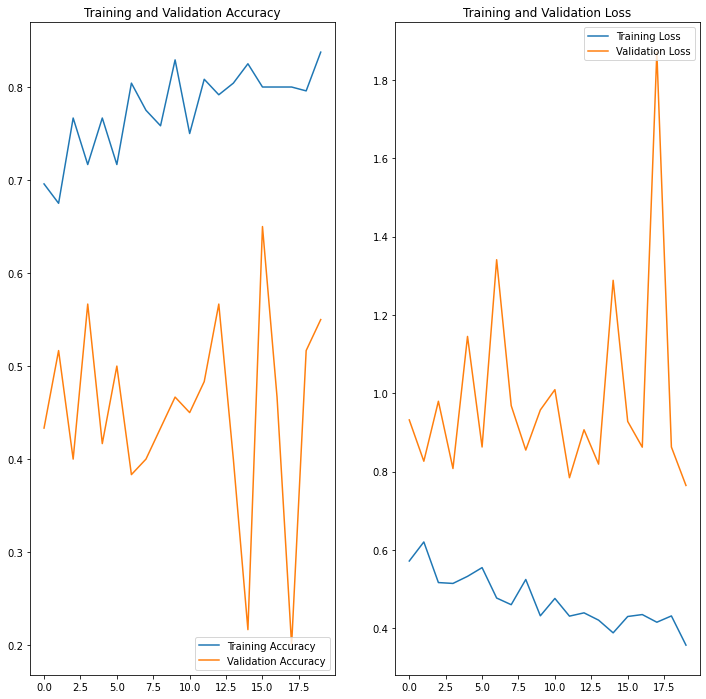

In [25]:
# Plot training and validation graphs
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
# Save the model TFLite
export_dir = 'cabbage/1'

tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: cabbage/1\assets


INFO:tensorflow:Assets written to: cabbage/1\assets


In [27]:
# Model optmization and conversion 
#@title Select mode of optimization
mode = "Default" #@param ["Default", "Storage", "Speed"]

if mode == 'Storage':
  optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
  optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
  optimization = tf.lite.Optimize.DEFAULT
  
optimization

<Optimize.DEFAULT: 'DEFAULT'>

In [28]:
# Convert saved model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [optimization]
tflite_model = converter.convert()

In [29]:
# Save the converted model tflite file
tflite_model_file = 'model.tflite'

with open(tflite_model_file, 'wb') as f:
    f.write(tflite_model)

with open('labels.txt', 'w') as f:
  f.write('\n'.join(CLASS_NAMES))


In [30]:
# Test the TFLITE model
interpretor = tf.lite.Interpreter(model_content=tflite_model)
interpretor.allocate_tensors()

#details
input_index = interpretor.get_input_details()[0]["index"]
output_index = interpretor.get_output_details()[0]["index"]

In [31]:
def get_label(file_path):
  parts = tf.strings.split(file_path, os.path.sep)
  return parts[-2] == CLASS_NAMES

def decode_img(img):
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

def process_path(file_path):
  label = get_label(file_path)
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [22]:
test_batches = tf.data.Dataset.list_files(str(data_dir/'train/*/*'))

test_batches = test_batches.map(process_path).batch(1).prefetch(1)

for img, label in test_batches.take(15):
  interpretor.set_tensor(input_index, img)
  interpretor.invoke()
  predict = interpretor.get_tensor(output_index)
  print("Predicted: {} - {:2.0f}% : True: {}".format(CLASS_NAMES[np.argmax(predict)],
                                                     100*np.max(predict),
                                                     CLASS_NAMES[label[0].numpy()==1]))

Predicted: Backmoth - 92% : True: ['Backmoth']
Predicted: Backmoth - 92% : True: ['Backmoth']
Predicted: Mildew - 74% : True: ['Mildew']
Predicted: Backmoth - 95% : True: ['Backmoth']
Predicted: Backmoth - 66% : True: ['Backmoth']
Predicted: Backmoth - 79% : True: ['Backmoth']
Predicted: Backmoth - 85% : True: ['Backmoth']
Predicted: Backmoth - 51% : True: ['Leafminer']
Predicted: Backmoth - 91% : True: ['Backmoth']
Predicted: Mildew - 92% : True: ['Mildew']
Predicted: Backmoth - 57% : True: ['Leafminer']
Predicted: Mildew - 86% : True: ['Mildew']
Predicted: Backmoth - 49% : True: ['Leafminer']
Predicted: Mildew - 43% : True: ['Mildew']
Predicted: Backmoth - 76% : True: ['Leafminer']


In [23]:
from PIL import Image

for index, (image, label) in enumerate(test_batches.take(3)):
  image = tf.cast(image * 255.0, tf.uint8)
  image = tf.squeeze(image).numpy()
  pil_image = Image.fromarray(image)
  pil_image.save('{}/val/{}_{}.jpg'.format(data_dir,CLASS_NAMES[label[0].numpy()==1][0].lower(), index))